# Putting it all together - Building a Value-Weighted Index

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Select Index Components & Import data

### Explore and clean company listing information
To get started with the construction of a market-value based index, you’ll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported pandas as pd, and loaded the listings data set with listings information from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.

In [2]:
listings = pd.read_csv('Data/stock_data/listings.csv')
# Inspect the listings data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               6674 non-null   object 
 1   Stock Symbol           6674 non-null   object 
 2   Company Name           6674 non-null   object 
 3   Last Sale              6590 non-null   float64
 4   Market Capitalization  6674 non-null   float64
 5   IPO Year               2852 non-null   float64
 6   Sector                 5182 non-null   object 
 7   Industry               5182 non-null   object 
dtypes: float64(3), object(5)
memory usage: 417.2+ KB


In [3]:
# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)
 
# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)
 
# Select companies with IPO Year before 2019
listings = listings.loc[listings['IPO Year'] < 2019]

In [4]:
# Inspect the new listings data
print(listings.info())

print('----------------------------------------')

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   Last Sale              2349 non-null   float64
 3   Market Capitalization  2349 non-null   float64
 4   IPO Year               2349 non-null   float64
 5   Sector                 2349 non-null   object 
 6   Industry               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 146.8+ KB
None
----------------------------------------
Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Public Utilities         104
Basic Industries         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Cons

### Select and inspect Index Components
Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You’ll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [5]:
# Change Listings IPO year to 2010
listings = listings.loc[listings['IPO Year'] < 2010]

In [6]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

Sector                 Stock Symbol
Technology             AAPL            7.400240e+11
Consumer Services      AMZN            4.221390e+11
Miscellaneous          MA              1.233300e+11
Health Care            AMGN            1.189270e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Consumer Non-Durables  EL              3.112251e+10
Capital Goods          ILMN            2.540938e+10
Energy                 PAA             2.222300e+10
Consumer Durables      CPRT            1.362092e+10
Name: Market Capitalization, dtype: float64


In [7]:
# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)
 
# Print company name, market cap, and last price for each component
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
info_cols = listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False)
print(info_cols)

Index(['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
AAPL                                  Apple Inc.           7.400240e+11   
AMZN                            Amazon.com, Inc.           4.221390e+11   
MA                       Mastercard Incorporated           1.233300e+11   
AMGN                                  Amgen Inc.           1.189270e+11   
UPS                  United Parcel Service, Inc.           9.018089e+10   
GS               Goldman Sachs Group, Inc. (The)           8.884059e+10   
RIO                                Rio Tinto Plc           7.043148e+10   
TEF                                Telefonica SA           5.460981e+10   
EL            Estee Lauder Companies, Inc. (The)           3.112251e+10   
ILMN                           

### Import index component price information
Now you’ll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

In [8]:
# Print tickers
print(tickers)

Index(['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [9]:
# Import prices and inspect result
stock_prices = pd.read_csv('Data/stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())
 
# Calculate the returns  
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


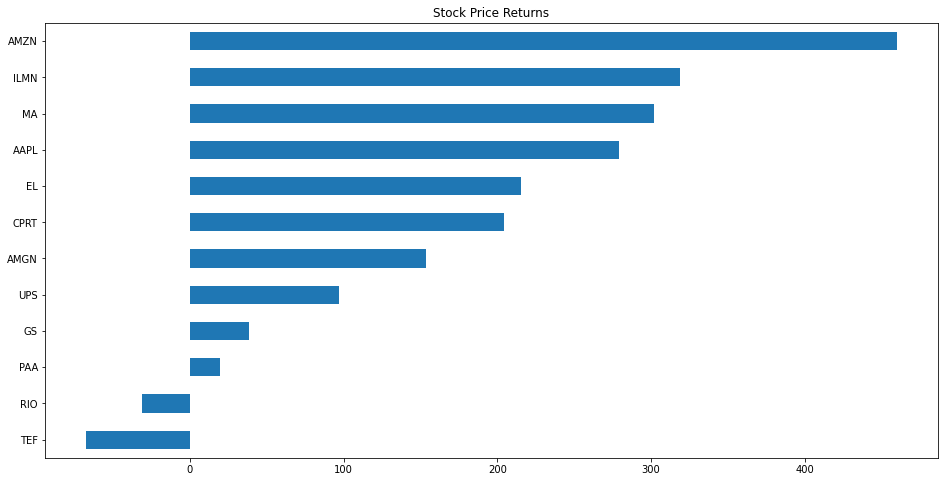

In [10]:
# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns', figsize=(16,8))
plt.show()

## Build a market-cap weighted index

### Calculate number of shares outstanding
The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [11]:
# Inspect listings and print tickers
print(listings.info())
listings.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, ACU to YPF
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               1015 non-null   object 
 1   Company Name           1015 non-null   object 
 2   Last Sale              1015 non-null   float64
 3   Market Capitalization  1015 non-null   float64
 4   IPO Year               1015 non-null   float64
 5   Sector                 1015 non-null   object 
 6   Industry               1015 non-null   object 
dtypes: float64(3), object(4)
memory usage: 103.4+ KB
None


,Exchange,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,,
ACU,amex,Acme United Corporation.,27.39,9.113899e+07,1988.0,Capital Goods,Industrial Machinery/Components
ROX,amex,"Castle Brands, Inc.",1.46,2.376444e+08,2006.0,Consumer Non-Durables,Beverages (Production/Distribution)


In [12]:
# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]
 
# Print the first rows of components
print(components.head(12))

              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    7.043148e+10      38.94
ILMN                   2.540938e+10     173.68
CPRT                   1.362092e+10      29.65
EL                     3.112251e+10      84.94
AMZN                   4.221390e+11     884.67
PAA                    2.222300e+10      30.72
GS                     8.884059e+10     223.32
AMGN                   1.189270e+11     161.61
MA                     1.233300e+11     111.22
TEF                    5.460981e+10      10.84
AAPL                   7.400240e+11     141.05
UPS                    9.018089e+10     103.74


In [13]:
# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])
 
# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

Stock Symbol
AAPL    5.246537e+09
TEF     5.037805e+09
RIO     1.808718e+09
MA      1.108883e+09
UPS     8.692972e+08
AMGN    7.358889e+08
PAA     7.234050e+08
AMZN    4.771711e+08
CPRT    4.593903e+08
GS      3.978174e+08
EL      3.664058e+08
ILMN    1.463000e+08
dtype: float64


### Create time series of market value
You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

In [14]:
# Select the number of shares in millions
no_shares = no_shares / 1000000
print(no_shares.sort_values())

Stock Symbol
ILMN     146.300000
EL       366.405816
GS       397.817439
CPRT     459.390316
AMZN     477.171149
PAA      723.404994
AMGN     735.888868
UPS      869.297154
MA      1108.883294
RIO     1808.717948
TEF     5037.804990
AAPL    5246.536689
dtype: float64


In [15]:
# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

market_cap.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,160386.626586,42475.505476,63893.216793,2090.225938,8892.669154,68854.242342,4469.465,28476.122999,19531.934838,101342.466626,143829.332466,50575.708420
2010-01-05,160701.418788,42107.561042,64270.182000,2090.225938,8859.692631,70071.563705,4440.205,28398.501169,19748.956336,102916.051241,143728.576366,50662.638135
2010-01-06,158130.615810,41791.128829,63105.884398,2081.038131,8885.341038,69323.666920,4713.786,28343.057004,19741.722287,106063.220471,142217.234869,50288.840359
2010-01-07,157815.823609,41408.466617,62032.249313,2067.256422,8998.926841,70680.224387,4794.251,28154.546844,19502.998639,106081.307650,139799.088474,49906.349611
2010-01-08,158865.130946,41776.411051,63711.891756,2076.444228,9035.567423,69343.557792,4849.845,28165.635677,19568.105088,107256.974316,138892.283575,52305.609756


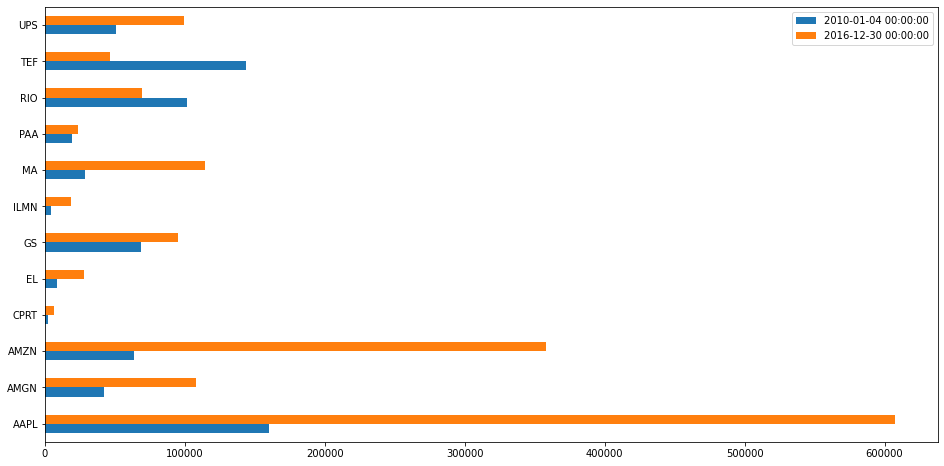

In [16]:
# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]
 
# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh', figsize=(16,8))
plt.show()

### Calculate & plot the composite index
By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [17]:
# Inspect Data
market_cap.head(2)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,160386.626586,42475.505476,63893.216793,2090.225938,8892.669154,68854.242342,4469.465,28476.122999,19531.934838,101342.466626,143829.332466,50575.708420
2010-01-05,160701.418788,42107.561042,64270.182000,2090.225938,8859.692631,70071.563705,4440.205,28398.501169,19748.956336,102916.051241,143728.576366,50662.638135


In [18]:
# Aggregate and print the market cap per trading day
raw_index = market_cap.sum(axis=1).dropna()
print(raw_index)

Date
2010-01-04    6.948175e+05
2010-01-05    6.979956e+05
2010-01-06    6.946855e+05
2010-01-07    6.912415e+05
2010-01-08    6.958475e+05
                  ...     
2016-12-23    1.588874e+06
2016-12-27    1.599280e+06
2016-12-28    1.593635e+06
2016-12-29    1.589422e+06
2016-12-30    1.574861e+06
Length: 1762, dtype: float64


In [19]:
# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485329
2010-01-08    100.148232
                 ...    
2016-12-23    228.675006
2016-12-27    230.172674
2016-12-28    229.360228
2016-12-29    228.753826
2016-12-30    226.658270
Length: 1762, dtype: float64


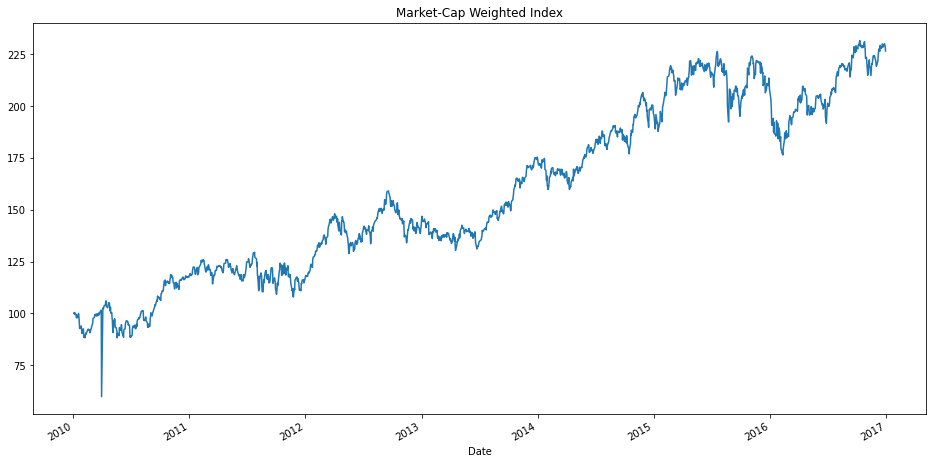

In [20]:
# Plot the index here
index.plot(title='Market-Cap Weighted Index', figsize=(16,8))
plt.show()

## Evaluate index performance

### Calculate the contribution of each stock to the index
You have successfully built the value-weighted index. Let’s now explore how it performed over the 2010-2016 period.

Let’s also determine how much each stock has contributed to the index return.

In [21]:
# Calculate and print the index return here
index_return = (index[-1] / index[0] - 1) * 100
print(index_return)

126.65827041741404


In [22]:
# Select the market capitalization
market_cap = components['Market Capitalization']
 
# Calculate the total market cap
total_market_cap = market_cap.sum()
 
# Calculate the component weights, and print the result
weights = market_cap / total_market_cap
print(weights.sort_values())

Stock Symbol
CPRT    0.007564
PAA     0.012340
ILMN    0.014110
EL      0.017282
TEF     0.030324
RIO     0.039110
GS      0.049332
UPS     0.050077
AMGN    0.066039
MA      0.068484
AMZN    0.234410
AAPL    0.410928
Name: Market Capitalization, dtype: float64


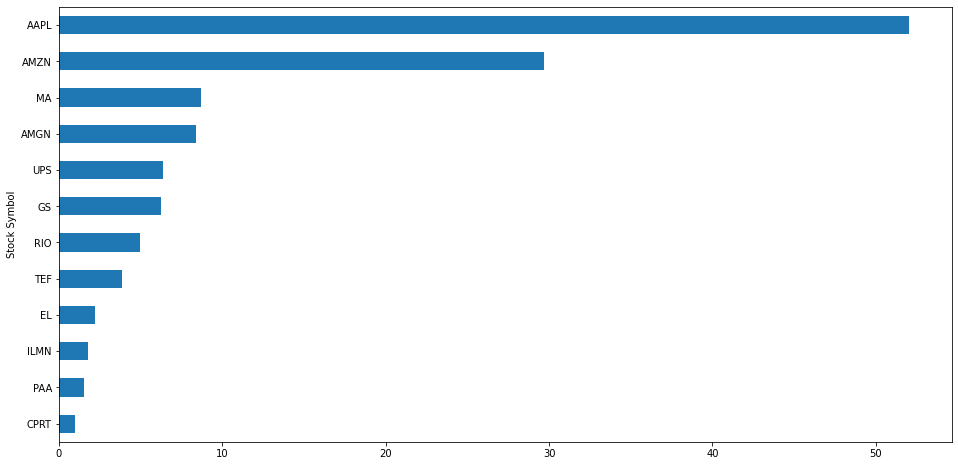

In [23]:
# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh',figsize=(16,8))
plt.show()

### Compare index performance against benchmark I
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [24]:
djia = pd.read_csv('Data/stock_data/djia.csv', parse_dates=['date'], index_col='date')
# Inspect djia
djia.head()

,djia
date,
2007-06-29,13408.62
2007-07-02,13535.43
2007-07-03,13577.30
2007-07-04,NaN
2007-07-05,13565.84


In [25]:
# Convert index series to dataframe here
data = index.to_frame('Index')
 
# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia
 
# Show total return for both index and djia
print((data.iloc[-1] / data.iloc[0] -1 ) * 100)

Index    126.658270
DJIA      86.722172
dtype: float64


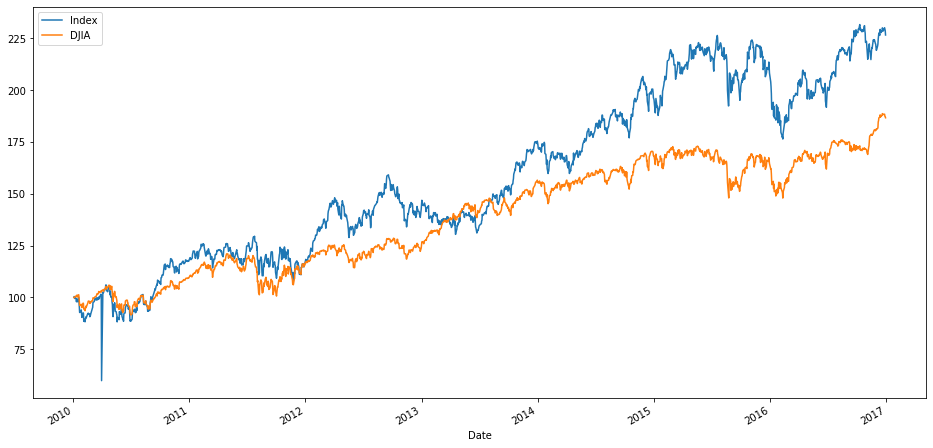

In [26]:
# Plot both series
data = data.div(data.iloc[0]).mul(100)
data.plot(figsize=(16,8))
plt.show()

### Compare index performance against benchmark II
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [27]:
# Inspect data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index        DJIA
Date                              
2010-01-04  100.000000  100.000000
2010-01-05  100.457394   99.887188
2010-01-06   99.981005   99.902872
2010-01-07   99.485329  100.216365
2010-01-08  100.148232  100.323414


In [28]:
# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100
 
# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

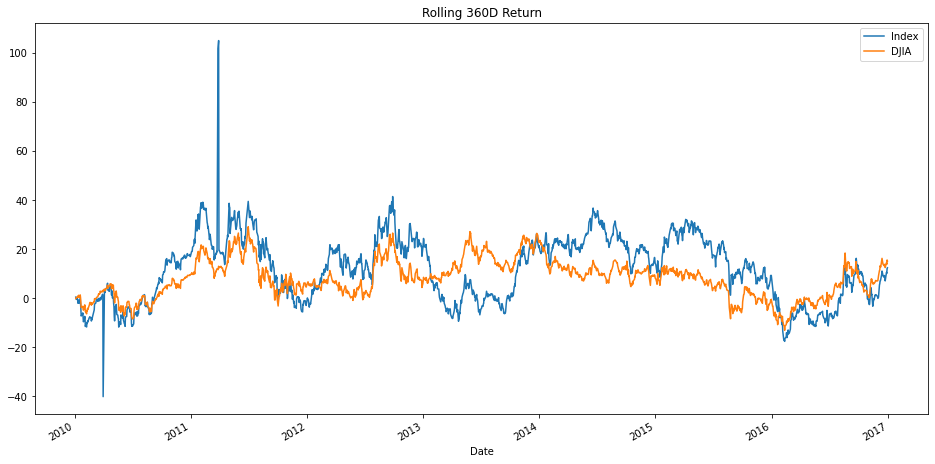

In [29]:
# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return',figsize=(16,8))
plt.show()

## Index correlation & exporting to excel

### Visualize your index constituent correlations
To better understand the characteristics of your index constituents, you can calculate the return correlations.

Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!

          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   
GS    0.344981  0.390076  0.333402  0.423160  0.358318  1.000000  0.266063   
ILMN  0.264791  0.336927  0.242726  0.265665  0.214027  0.266063  1.000000   
MA    0.391421  0.400230  0.428330  0.401352  0.431556  0.466796  0.301392   
PAA   0.212960  0.229255  0.182438  0.221273  0.206056  0.271982  0.162796   
RIO   0.361684  0.313878  0.326229  0.384944  0.415416  0.527298  0.234445   
TEF   0.325309  0.374555  0.331867  0.376767  0.428925  0.498230  0.231173   
UPS   0.366039  0.432468  0.378399  0.462716  0.456952  0.506407

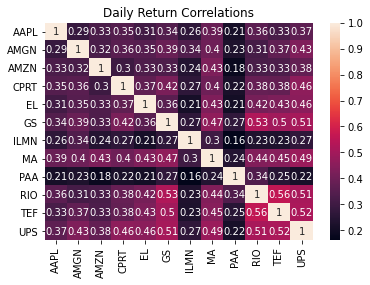

In [30]:
# Calculate the daily returns
returns = stock_prices.pct_change()
 
# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)
 
# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()

### Save your analysis to multiple excel worksheets
Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

Let’s practice exporting various DataFrame to multiple Excel worksheets.

In [31]:
# Inspect index and stock_prices
# print(index.info())
# print(stock_prices.info())
 
# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
# print(data.info())
 
# Create index & stock price returns
returns = data.pct_change()
 
# Export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')

ValueError: Other Series must have a name